<a href="https://colab.research.google.com/github/PeterDahlstrom1/ECE50024FinalProject/blob/main/ECE50024PeterDahlstromFinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing basic python packages
import cv2
import numpy as np 
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import scipy

In [2]:
#Uploading Images to Google Colab
from google.colab import files
uploaded = files.upload()

Saving House256.png to House256.png
Saving myImage.png to myImage.png


In [3]:
def matlab_style_gauss2D(shape=(9,9),sigma=1):
    """
    2D gaussian mask - should give the same result as MATLAB's
    fspecial('gaussian',[shape],[sigma])
    """
    m,n = [(ss-1.)/2. for ss in shape]
    y,x = np.ogrid[-m:m+1,-n:n+1]
    h = np.exp( -(x*x + y*y) / (2.*sigma*sigma) )
    h[ h < np.finfo(h.dtype).eps*h.max() ] = 0
    sumh = h.sum()
    if sumh != 0:
        h /= sumh
    return h

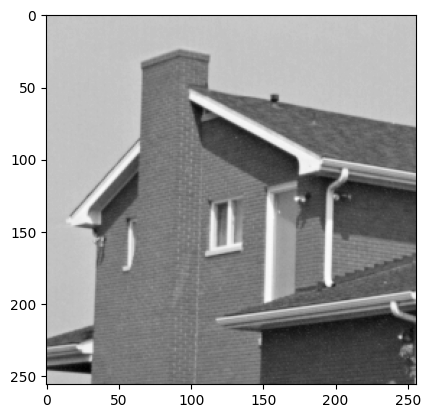

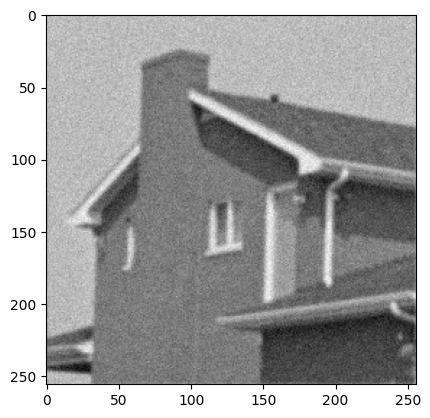

In [4]:
#Original Image
img = mpimg.imread('House256.png')
Y = plt.imread('House256.png')
#Noisy Image
img2 = mpimg.imread('myImage.png')
Y2 = plt.imread('myImage.png')
#image sclicing into 2D. 

#Plot Original Corrupted image
imgplot = plt.imshow(Y,cmap="gray")
plt.show()
#Plot Noisy image
imgplot2 = plt.imshow(Y2,cmap="gray")
plt.show()

In [111]:
#Set parameters of ADMM
lambdaVal = 0.0005      #Regularization Parameter
rhoVal = 1              #Internal parameter of ADMM
gammaVal = 1            #Parameter used to update rho value
maxIterations = 10     #The maximum number of iterations of ADMM 
tolerance = 1e-4        #Tolerance level for the total residual

In [124]:
#Other variables for ADMM algorithm
rows = len(Y)                 #Number of rows in image 
cols = len(Y[0])              #Number of columns in image 
NumPixels = rows*cols         #Number of pixels in image
v = .5*np.ones([rows,cols])   #Initial 'v' matrix
x = v                         #Initial 'x' matrix
u = np.zeros([rows,cols])     #Initial 'u' matrix 
h = matlab_style_gauss2D((9,9),1)
Hty = scipy.ndimage.correlate(Y2, h, mode='wrap')
eigHtH = np.power(np.absolute(np.fft.fftn(h,(256,256))),2)
residual = 10e10

0.08911159406728308
0.16116246431100073
0.045551429032024186
0.016568132418953205
0.011698175104768584
0.0117549960486029
0.009205687648191827
0.007676732321671171
0.005792608516348775
0.004854594725396604


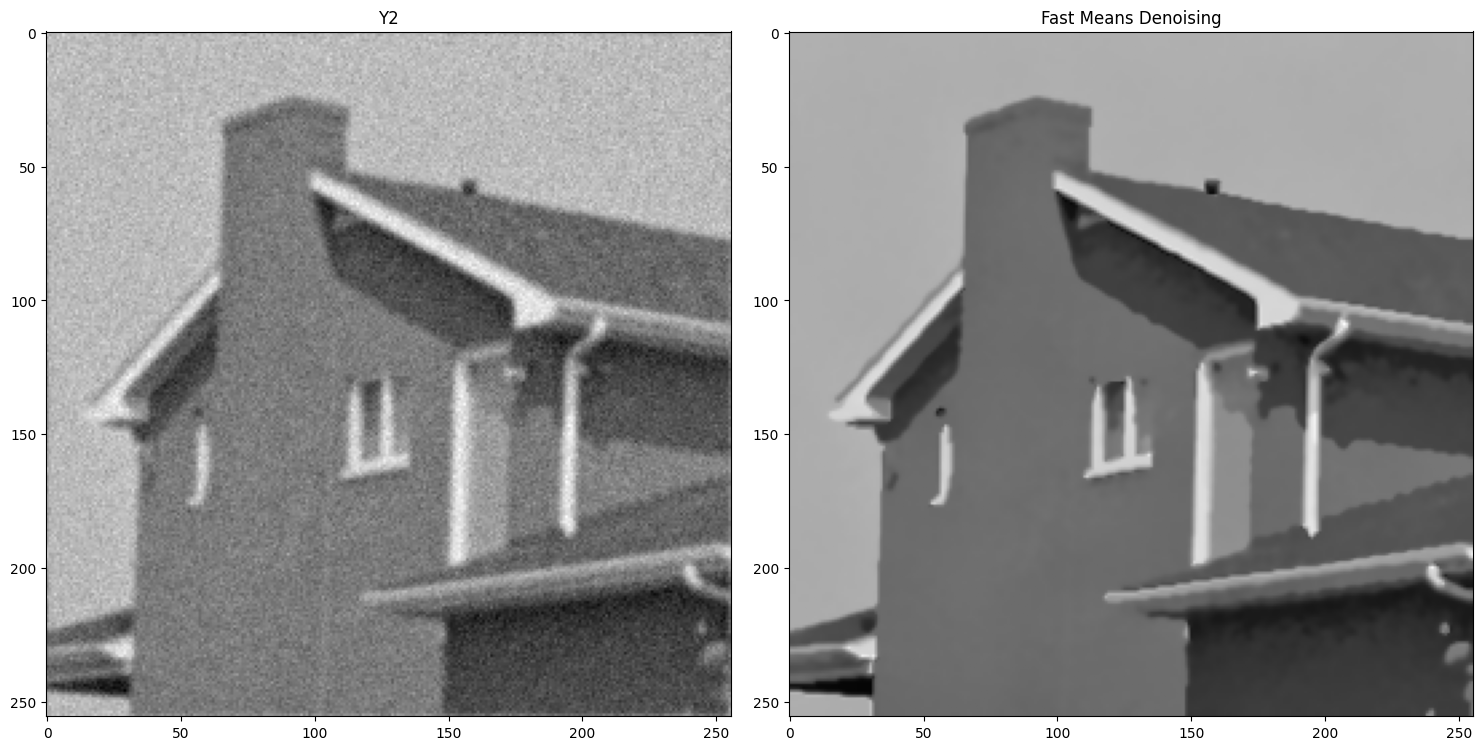

In [125]:
#ADMM
iterations = 1
while (iterations<=maxIterations):

  #Before iteration parameter to calculate residuals
  xOld = x
  vOld = v
  uOld = u

  #Inversion Step

  xtilde = v-u
  rhs = np.fft.fftn((Hty + rhoVal*xtilde))
  x = np.real(np.fft.ifftn(np.divide(rhs,(rhoVal+eigHtH))))


  #The "off the shelf" Denoiser
  vtilde = (x + u)  

  #vvec = np.reshape(v,NumPixels)
  #for w in range(NumPixels):
  #  if vvec[(w)] > 1:
  #    vvec[(w)] = 1
  #  elif vvec[(w)] < 0:
  #    vvec[(w)] = 0
  #  else:
  #    a = 1
  
  #vtilde = np.reshape(vvec,[256,256])

  I = cv2.normalize(vtilde, None, 255, 0, cv2.NORM_MINMAX, cv2.CV_8U)
  dst = cv2.fastNlMeansDenoising(I, 3.0, 10, 2)/255
  v = (dst.astype(np.float32))

  #Update lagrangian multiplier
  u = u + (x - v)
 

  #Calculate residual
  residualxx = (1/np.sqrt(NumPixels))*np.sqrt(np.sum(np.sum(np.power((x-xOld),2))))
  residualu = (1/np.sqrt(NumPixels))*np.sqrt(np.sum(np.sum(np.power((u-uOld),2))))
  residualv = (1/np.sqrt(NumPixels))*np.sqrt(np.sum(np.sum(np.power((v-vOld),2))))

  print(residualxx)

  

  iterations = iterations + 1

  #


v = (v.astype(np.float32))

row, col = 1, 2
fig, axs = plt.subplots(row, col, figsize=(15, 10))
fig.tight_layout()
axs[0].imshow(cv2.cvtColor(Y2, cv2.COLOR_BGR2RGB))
axs[0].set_title('Y2')
axs[1].imshow(cv2.cvtColor(v, cv2.COLOR_BGR2RGB))
axs[1].set_title('Fast Means Denoising')
plt.show()

In [119]:
residualxx

0.003245653544659113

In [120]:
residualu

0.0018377873970618502

In [121]:
residualv

0.0013030741829425097

In [13]:
x

array([[0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
       ...,
       [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5]])